# Google Brain - Ventilator Pressure Prediction(Using TensorFlow)

In [1]:
# Installing the modules

!pip3 install kaggle

In [2]:

# Required modules

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from zipfile import ZipFile
from google.colab import files
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler

In [3]:
# Config

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 7)

In [4]:
# Upload the creds

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anurag1817","key":"fee9a6f9d27c73cdef9835b97335e533"}'}

In [5]:
# Create kaggle folder

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
# Test the command

!kaggle competitions download -c ventilator-pressure-prediction

 94% 8.00M/8.50M [00:00<00:00, 83.3MB/s]
100% 8.50M/8.50M [00:00<00:00, 78.6MB/s]
 80% 60.0M/75.4M [00:00<00:00, 109MB/s] 
100% 75.4M/75.4M [00:00<00:00, 153MB/s]
 95% 132M/139M [00:00<00:00, 147MB/s]
100% 139M/139M [00:01<00:00, 136MB/s]


In [7]:
# Opening the zipfile

with ZipFile('train.csv.zip', 'r') as zf:
    zf.extractall('./')

with ZipFile('test.csv.zip', 'r') as zf:
    zf.extractall('./')

with ZipFile('sample_submission.csv.zip', 'r') as zf:
    zf.extractall('./')

In [8]:
# Load the train data

train = pd.read_csv('train.csv', index_col=['id'])
train.head()

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,breath_id,R,C,time_step,u_in,u_out,pressure
id,,,,,,,
1,1,20,50,0.000000,0.083334,0,5.837492
2,1,20,50,0.033652,18.383041,0,5.907794
3,1,20,50,0.067514,22.509278,0,7.876254
4,1,20,50,0.101542,22.808822,0,11.742872
5,1,20,50,0.135756,25.355850,0,12.234987


In [9]:
# Inspecting the train data

train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6036000 entries, 1 to 6036000
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   breath_id  int64  
 1   R          int64  
 2   C          int64  
 3   time_step  float64
 4   u_in       float64
 5   u_out      int64  
 6   pressure   float64
dtypes: float64(3), int64(4)
memory usage: 368.4 MB


,breath_id,R,C,time_step,u_in,u_out,pressure
count,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06
mean,6.283886e+04,2.703618e+01,2.608072e+01,1.307225e+00,7.321615e+00,6.204493e-01,1.122041e+01
std,3.633526e+04,1.959549e+01,1.715231e+01,7.659778e-01,1.343470e+01,4.852752e-01,8.109703e+00
min,1.000000e+00,5.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-1.895744e+00
25%,3.137700e+04,5.000000e+00,1.000000e+01,6.428995e-01,3.936623e-01,0.000000e+00,6.329607e+00
50%,6.276550e+04,2.000000e+01,2.000000e+01,1.308123e+00,4.386146e+00,1.000000e+00,7.032628e+00
75%,9.430100e+04,5.000000e+01,5.000000e+01,1.965502e+00,4.983895e+00,1.000000e+00,1.364103e+01
max,1.257490e+05,5.000000e+01,5.000000e+01,2.937238e+00,1.000000e+02,1.000000e+00,6.482099e+01


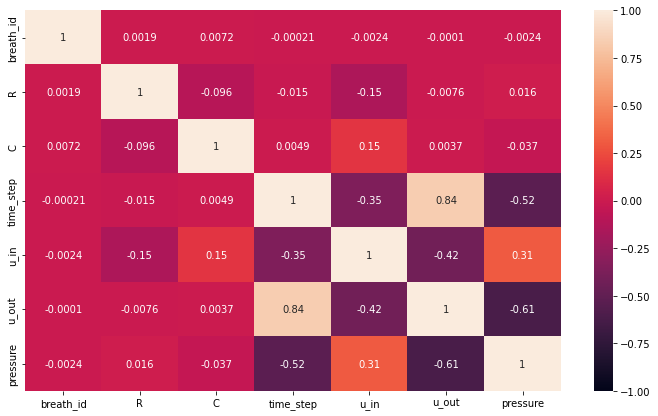

In [10]:
# Correlation matrix

sns.heatmap(train.corr(), annot=True, vmin=-1, vmax=1)

In [11]:
# Missing values

if train.isna().any().any():
    print(train.isna().sum()/train.shape[0])
else:
    print("No Mising values")

No Mising values


In [12]:
# Seperating out features and labels

X = train.drop(['pressure'], axis=1)
y = train['pressure']

In [24]:
# Scaling the data

features_scale = StandardScaler()
pressure_scale = StandardScaler()

X_scaled = features_scale.fit_transform(X)
y_scaled = pressure_scale.fit_transform(y.values.reshape(-1, 1))

## TensorFlow Stuff

In [15]:
# Model Definition

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='linear'),
])

In [16]:
# Compiling the model

optim = tf.keras.optimizers.Adam()
loss = tf.keras.losses.mean_absolute_error

model.compile(optimizer=optim, loss=loss, metrics=['mse'])

In [17]:
# Fitting the model

epochs = 10
batch_size = 64

history = model.fit(x=X_scaled, y=y_scaled, validation_split=0.2, epochs=epochs, batch_size=batch_size)

Epoch 1/10
75450/75450 [==============================] - 264s 3ms/step - loss: 0.4238 - mse: 0.6284 - val_loss: 0.4004 - val_mse: 0.5148
Epoch 2/10
75450/75450 [==============================] - 246s 3ms/step - loss: 0.4132 - mse: 0.6047 - val_loss: 0.3893 - val_mse: 0.4866
Epoch 3/10
75450/75450 [==============================] - 252s 3ms/step - loss: 0.4122 - mse: 0.6027 - val_loss: 0.3964 - val_mse: 0.5047
Epoch 4/10
75450/75450 [==============================] - 245s 3ms/step - loss: 0.4110 - mse: 0.5985 - val_loss: 0.3933 - val_mse: 0.5090
Epoch 5/10
75450/75450 [==============================] - 252s 3ms/step - loss: 0.4103 - mse: 0.5972 - val_loss: 0.4004 - val_mse: 0.5193
Epoch 6/10
75450/75450 [==============================] - 238s 3ms/step - loss: 0.4096 - mse: 0.5956 - val_loss: 0.3996 - val_mse: 0.5196
Epoch 7/10
75450/75450 [==============================] - 234s 3ms/step - loss: 0.4091 - mse: 0.5947 - val_loss: 0.3956 - val_mse: 0.5001
Epoch 8/10
75450/75450 [==========

In [18]:
# Model Summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 7)                 49        
_________________________________________________________________
dropout (Dropout)            (None, 7)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 1

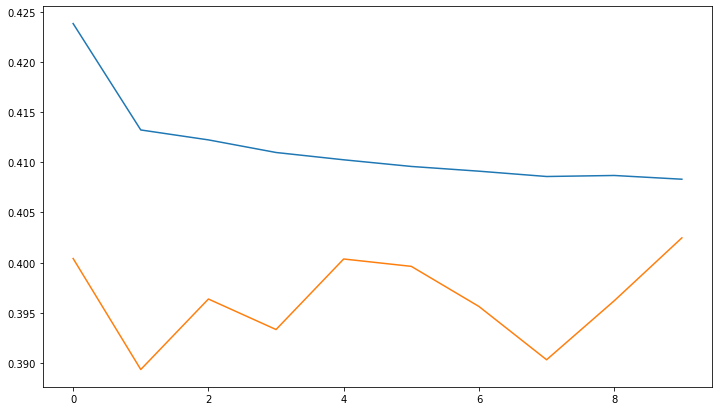

In [19]:
# Plotting the mae

plt.plot(range(epochs), history.history['loss'], label='Training Loss')
plt.plot(range(epochs), history.history['val_loss'], label='Validation Loss')

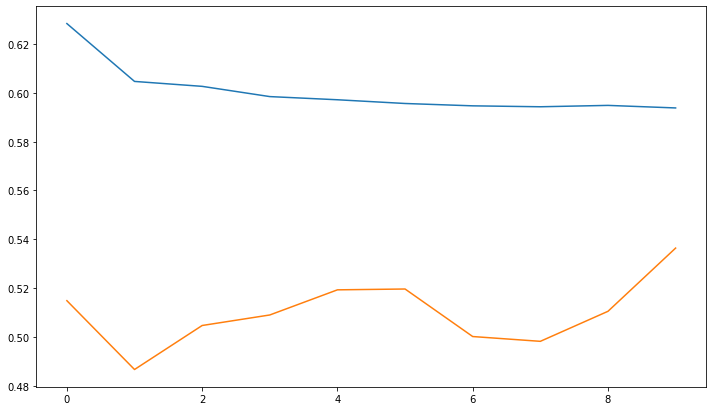

In [20]:
# Plotting the mse

plt.plot(range(epochs), history.history['mse'], label='Training MSE')
plt.plot(range(epochs), history.history['val_mse'], label='Validation MSE')

In [21]:
# Loading the test set

test = pd.read_csv('test.csv', index_col=['id'])
test.head()

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,breath_id,R,C,time_step,u_in,u_out
id,,,,,,
1,0,5,20,0.000000,0.000000,0
2,0,5,20,0.031904,7.515046,0
3,0,5,20,0.063827,14.651675,0
4,0,5,20,0.095751,21.230610,0
5,0,5,20,0.127644,26.320956,0


In [25]:
# Scaling the test

test_scaled = features_scale.transform(test)

In [26]:
# Prediction on test set

test_pred = model.predict(test_scaled)

In [27]:
# Inversing the scaling

test_pred = pressure_scale.inverse_transform(test_pred)

In [28]:
# Submission

submission = pd.read_csv('sample_submission.csv')
submission['pressure'] = test_pred
submission.to_csv('output.csv', index=False)

In [29]:
# Kaggle Submission

!kaggle competitions submit -c ventilator-pressure-prediction -f output.csv -m "TF with dropouts and scaling"

100% 67.5M/67.5M [00:02<00:00, 31.2MB/s]
Successfully submitted to Google Brain - Ventilator Pressure Prediction